# Support-Vector Machine - Classification

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: [sklearn](https://scikit-learn.org/stable/modules/svm.html), [wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

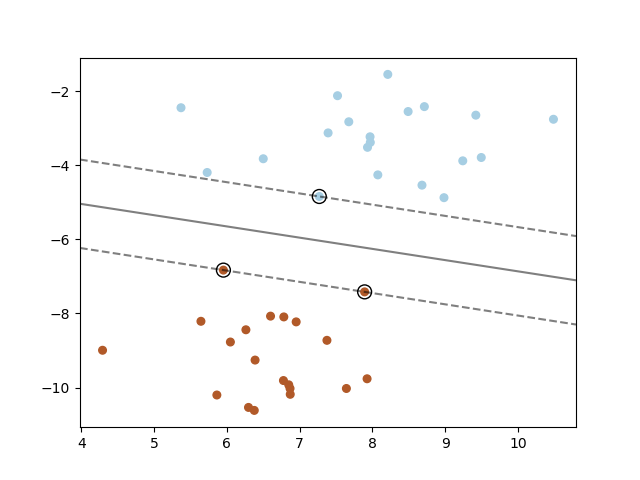

# Classification on csv data -----

In [2]:
#!pip install wget

import wget

In [13]:
# Download data

# Data link - https://raw.githubusercontent.com/MegaCreater/makeing_machine_smarter/main/fruit_data_with_colors.txt
   
wget.download("https://raw.githubusercontent.com/MegaCreater/makeing_machine_smarter/main/fruit_data_with_colors.txt")


100% [................................................................................] 2310 / 2310

'fruit_data_with_colors.txt'

In [14]:
# Read csv file using pandas

# Import modules
import pandas as pd

fruits_data=pd.read_csv('fruit_data_with_colors.txt',sep='\t')

# Shape of data 
print(fruits_data.shape)

fruits_data.head()

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [10]:
fruits_data.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [11]:
# Number of classes / names

print(fruits_data.fruit_label.unique())     # or set(fruits_data.fruit_label.values)
print(fruits_data.fruit_name.unique())

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [12]:
# Classes dict

cls_dict=dict(zip(fruits_data.fruit_label.unique(),fruits_data.fruit_name.unique()))

print(cls_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [13]:
# dataframe info
fruits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [14]:
# dataframe statistics 
fruits_data.describe().loc[:,['mass','width','height','color_score']]   # dataframe.loc[[rows],[columns]]

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [15]:
# Pandas 2 numpy arrays 

# Data
X=fruits_data.loc[:,['width','height']].values

# Labels 
y=fruits_data.loc[:,['fruit_label']].values

print('X-data shape',X.shape)
print('y-data shape',y.shape)

X-data shape (59, 2)
y-data shape (59, 1)


In [16]:
# Divide data into train and test sets using - sklearn.model_selection.train_test_split()
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (39, 2)
y_train shape:  (39, 1)
X_test shape:  (20, 2)
y_test shape:  (20, 1)


In [18]:
# Make classifier
from sklearn.svm import SVC

fruits_clf=SVC()

# Train classifier
fruits_clf.fit(X_train,y_train)

C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [19]:
# Test model 

print("Model score:",fruits_clf.score(X_test,y_test))

y_pred=fruits_clf.predict(X_test)

Model score: 0.75


In [20]:
compair_matrix=y_pred.reshape(-1)==y_test.reshape(-1)

print('Compair:',compair_matrix)
print('Number of true predictions:',len(compair_matrix[compair_matrix==True]))
print('Number of false predictions:',len(compair_matrix[compair_matrix==False]))

Compair: [ True  True False False False  True  True  True  True False  True  True
  True  True False  True  True  True  True  True]
Number of true predictions: 15
Number of false predictions: 5


### [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) 

In [21]:
# Import module 
from sklearn.metrics import confusion_matrix

example_true=[2,0,2,2,0,1]
example_pred=[0,0,2,2,0,2]

# Make Matrix -
confusion_matrix(example_true,example_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [22]:
# For labels data

example_true=["cat","ant","cat","cat","ant","bird"]
example_pred=["ant","ant","cat","cat","ant","cat"]
confusion_matrix(example_true,example_pred,labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [23]:
# Plot confusion_matrix for our dataset
confusion_matrix(y_test,y_pred)           # {1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

array([[3, 0, 3, 0],
       [0, 4, 0, 0],
       [1, 0, 3, 0],
       [0, 0, 1, 5]], dtype=int64)

### [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance)

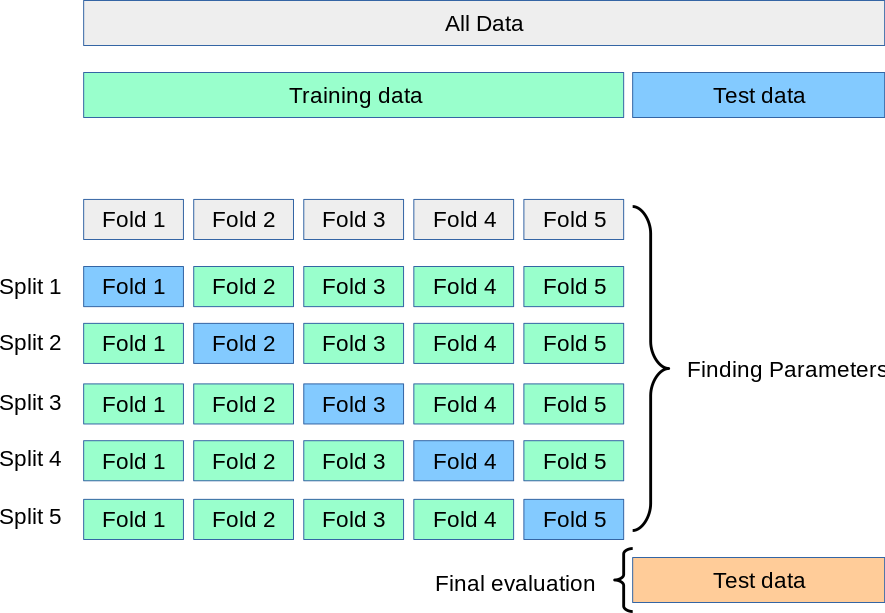

In [24]:
# Import Module
from sklearn.model_selection import cross_val_score

# Data
X=fruits_data.loc[:,['width','height']].values
# Labels 
y=fruits_data.loc[:,['fruit_label']].values.ravel()

# Test classifier
test_clf=SVC()

# Get scores
scores=cross_val_score(test_clf,X,y,cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.58333333 0.66666667 0.83333333 0.83333333 0.72727273]
0.73 accuracy with a standard deviation of 0.10


### More to read ---

* Bishop, [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), chapter 7 Sparse Kernel Machines
* [“A Tutorial on Support Vector Regression”](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.114.4288), Alex J. Smola, Bernhard Schölkopf - Statistics and Computing archive Volume 14 Issue 3, August 2004, p. 199-222.